<a href="https://colab.research.google.com/github/earo12/Anomaly-Credit-Card-Transactions-Detector/blob/debug/ANOMALY_CREDIT_CARD_DETECTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import math
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Reading the csv file

In [17]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [18]:
df.shape

(89220, 31)

In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
89215,62476,-0.815634,-0.244177,2.591455,-0.002720,-0.644497,0.418909,0.255767,0.115134,0.649661,...,-0.133162,-0.239654,0.095507,0.125146,-0.118362,1.077141,-0.173607,-0.148471,112.18,0.0
89216,62476,1.121527,0.208353,0.202133,1.138648,0.068794,-0.158828,0.176503,-0.105339,-0.145071,...,0.115269,0.354326,-0.179000,-0.240712,0.663680,-0.237553,0.031241,0.025737,53.64,0.0
89217,62478,-1.344549,0.543027,1.991882,-1.118447,-0.949264,0.196963,-0.070728,0.809195,0.331360,...,-0.134573,-0.417982,-0.071393,0.047068,0.267058,0.861676,0.067080,0.042724,69.00,0.0
89218,62480,0.789027,-1.180048,-0.633627,-0.141463,-0.317314,-0.124994,0.407588,-0.286734,-1.371513,...,-0.567100,-1.844598,-0.140709,-0.779335,0.129177,0.184364,-0.076960,0.060438,328.80,0.0
89219,62480,1.244599,-0.778287,-0.340844,-0.695168,-0.480820,-0.200516,-0.195502,-0.139240,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,89220.000000,89220.000000,89220.000000,89220.000000,89220.000000,89220.000000,89220.000000,89220.000000,89220.000000,89219.000000,...,89219.000000,89219.000000,89219.000000,89219.000000,89219.000000,89219.000000,89219.000000,89219.000000,89219.000000,89219.000000
mean,39715.015501,-0.265000,-0.039318,0.678729,0.162808,-0.278291,0.094282,-0.109561,0.054698,-0.028905,...,-0.029895,-0.106761,-0.037413,0.009718,0.132571,0.027095,0.001317,0.002412,98.532339,0.002365
std,16026.485819,1.873458,1.662182,1.352995,1.359523,1.370149,1.302130,1.230881,1.215535,1.129755,...,0.727551,0.634882,0.625389,0.594412,0.441100,0.496667,0.389659,0.326436,266.941369,0.048574
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,32165.000000,-1.028772,-0.603310,0.182821,-0.719037,-0.897378,-0.646335,-0.601120,-0.139866,-0.692643,...,-0.223859,-0.526395,-0.177767,-0.322006,-0.131948,-0.325915,-0.063273,-0.005744,7.675000,0.000000
50%,42017.000000,-0.262209,0.071676,0.760383,0.185833,-0.313066,-0.156213,-0.070878,0.071465,-0.102804,...,-0.057810,-0.082239,-0.049619,0.064928,0.171090,-0.070776,0.009396,0.023123,26.990000,0.000000
75%,52274.250000,1.152744,0.727352,1.386516,1.037554,0.254270,0.488962,0.416670,0.355072,0.589973,...,0.118714,0.309107,0.081203,0.406088,0.420191,0.306496,0.082733,0.076409,89.950000,0.000000
max,62480.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,18.946734,4.014444,5.525093,3.517346,12.152401,33.847808,19656.530000,1.000000


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

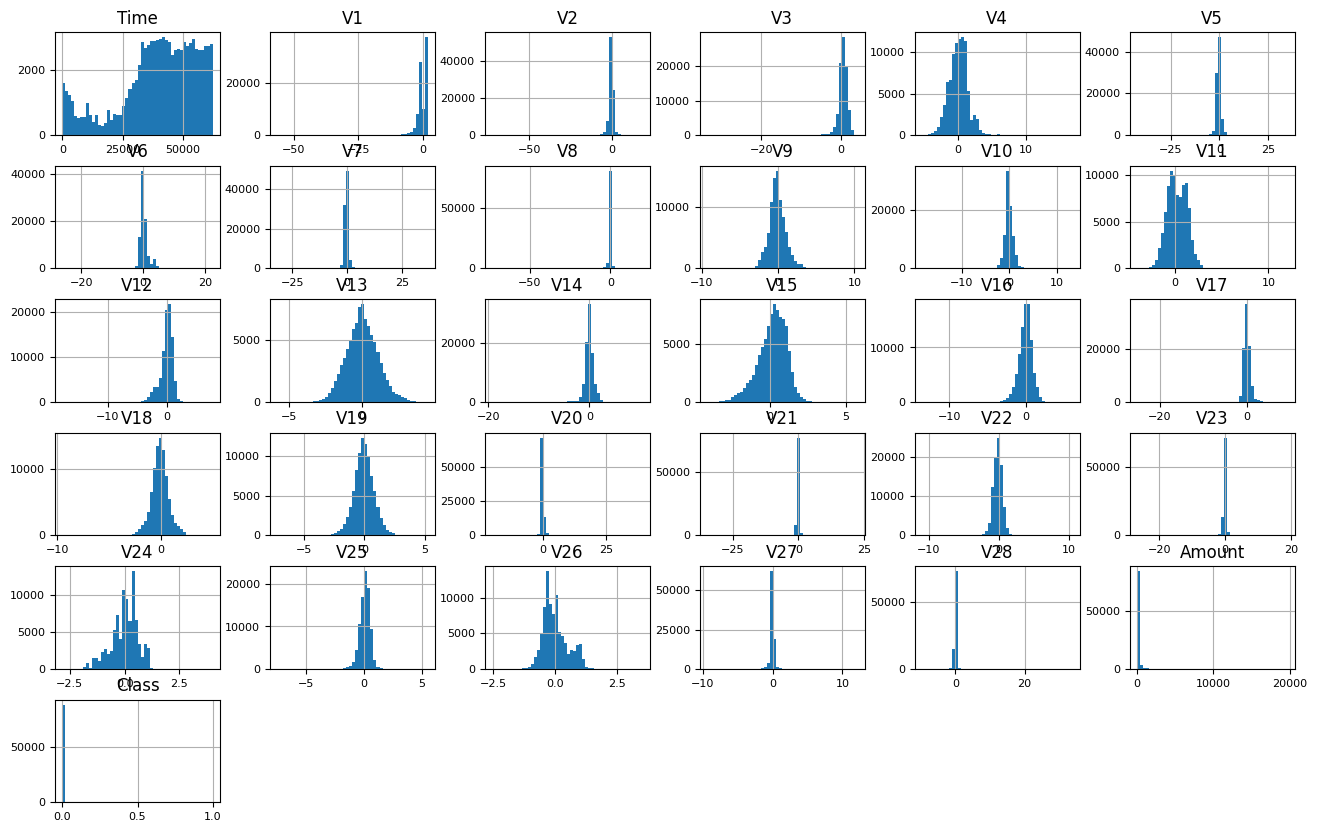

In [5]:
df.hist(figsize=(16, 10), bins=50, xlabelsize=8, ylabelsize=8)

Let us check some values, in particular TP, TN, FP and FN

In [19]:
data = df
data_0, data_1 = data[data['Class'] == 0], data[data['Class'] == 1]

In [7]:
data0, data1 = df[df['Class']==0], df[df['Class']==1]

In [8]:
X0, X1 = data0.drop('Class', axis = 1), data0['Class']
y0, y1 = data1.drop('Class', axis = 1), data1['Class']

In [16]:
y1.shape

(211,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X0, y0, test_size = 0.2, random_state = 40)

ValueError: Found input variables with inconsistent numbers of samples: [89008, 211]